<a href="https://colab.research.google.com/github/nawidadkhah/Graph_Simulation/blob/main/Graph_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [ ]:
def find_n2 (n1, d1):
  temp = n1 * d1
  q = []
  for i in range(2, int(temp/2)+1):
    if temp % i == 0:
      q.append(i)

  flag = False
  n2 = 0
  d2 = 0
  while flag == False:
   n2 = random.choice(q)
   if (n2 >= d1):
    flag = True
    d2 = int(temp / n2)
  return n2, d2

In [8]:
d1 = random.randint(2, 10)
n1 = random.randint(10, 30)
n2, d2 = find_n2(n1, d1)

# d1 = 2
# n1 = 30
# n2 = 20
# d2 = 3

print("d1 : " + str(d1),
      "\nd2 : " + str(d2),
      "\nn1 : " + str(n1),
      "\nn2 : " + str(n2)
      )

nodes_a = []
nodes_b = []
for i in range(1, n1 + 1):
  nodes_a += [i for x in range(d1)]

for i in range(n1 + 1, n1 + n2 + 1):
  nodes_b += [i for x in range(d2)]

print(len(nodes_a))
print(len(nodes_b))
print(nodes_a)
print(nodes_b)

d1 : 5 
d2 : 3 
n1 : 15 
n2 : 25
75
75
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15]
[16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40]


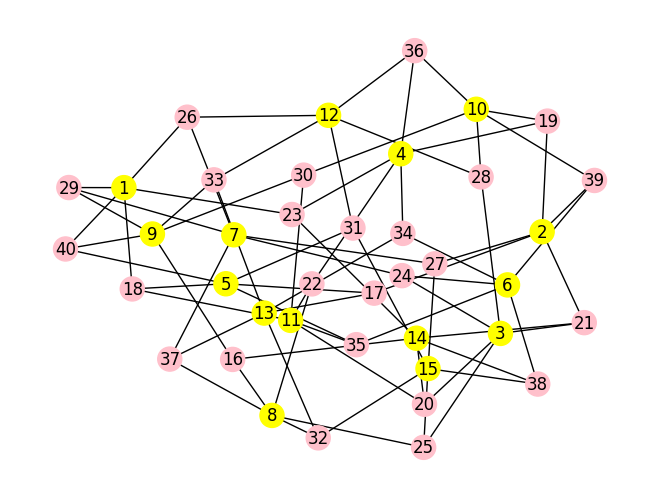

In [9]:
# Draw RSRBG graph
nodes_check = []
check_edge = {}
G = nx.Graph()
while (len(nodes_a) != 0):

  choose_a_index = random.randint(0, len(nodes_a))
  choose_b_index = random.randint(0, len(nodes_b))

  remove_a = nodes_a[ choose_a_index - 1 ]
  remove_b = nodes_b[ choose_b_index - 1 ]

  if nodes_check.count(remove_a) != True:
    nodes_check.append(remove_a)
    G.add_node(remove_a)
  if nodes_check.count(remove_b) != True:
    nodes_check.append(remove_b)
    G.add_node(remove_b)

  if not G.has_edge(remove_a, remove_b):
    G.add_edge(remove_a, remove_b)
    nodes_a.pop( choose_a_index - 1 )
    nodes_b.pop( choose_b_index - 1 )


color_map = []

for node in G:
  if node < n1 +1:
        color_map.append('yellow')
  else:
        color_map.append('pink')

nx.draw(G, node_color=color_map, with_labels=True)

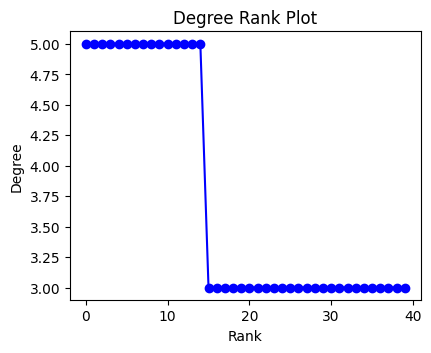

In [10]:

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
fig.tight_layout()
plt.show()

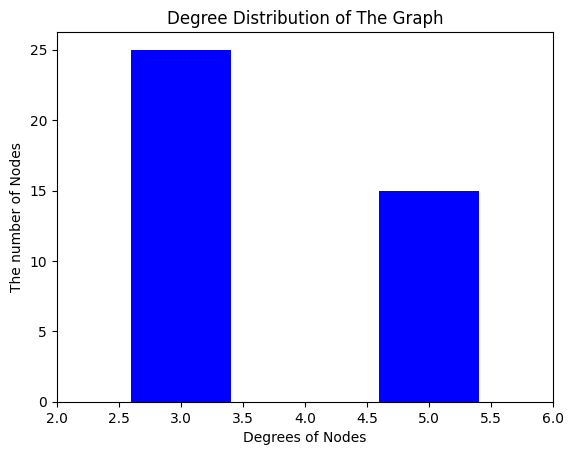

In [13]:
# Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
labels, counts = np.unique(degrees, return_counts=True)
plt.bar(labels, counts, color='blue', align='center')
plt.title("Degree Distribution of The Graph")
plt.xlabel("Degrees of Nodes")
plt.ylabel("The number of Nodes")
plt.xlim(min(d1,d2) - 1 , max(d1,d2) + 1)
plt.show()

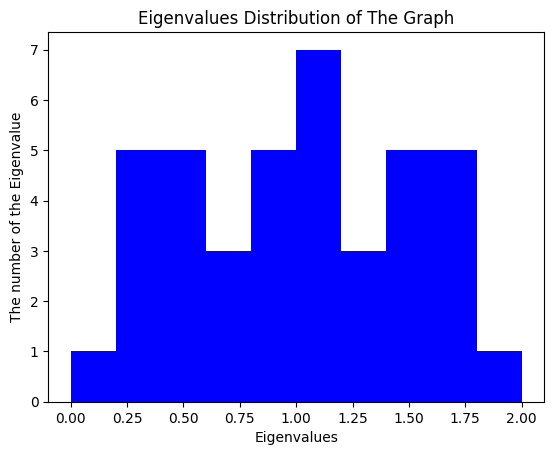

In [14]:
# Eigenvalues Distribution
lap_RSRBG = nx.normalized_laplacian_matrix(G)
e_RSRBG = np.linalg.eigvals(lap_RSRBG.toarray())   # compute eigenvalues of matrix.
plt.hist(e_RSRBG, color='blue')
plt.title("Eigenvalues Distribution of The Graph")
plt.xlabel("Eigenvalues")
plt.ylabel("The number of the Eigenvalue")
plt.show()

In [21]:
# Spectral Gap, Algebraic Connectivity
spect_G = e_RSRBG[-1] - e_RSRBG[-2]
print('Spectral Gap: ' + str(spect_G))

alg_connectivity_G = nx.algebraic_connectivity(G)
print('Algebraic Connectivity: ' + str(alg_connectivity_G))


Spectral Gap: 2.220446049250313e-16
Algebraic Connectivity: 0.9634095370734671


In [22]:
#  Natural Connectivity, Symmetry Ratio, Energy, Laplacian Energy
sum_natu = 0
for i in range(len(e_RSRBG)):
  sum_natu += (math.exp(e_RSRBG[i]) / (n1+n2))
sum_natu = math.floor(sum_natu)
natu_RSRBG = math.log(sum_natu)
print('Natural Connectivity: ' + str(natu_RSRBG))

e_RSRBG_remDuplic = []
for i in e_RSRBG:
  if i not in e_RSRBG_remDuplic:
    e_RSRBG_remDuplic.append(i)
dia_RSRBG = nx.diameter(G)
sym_rat_RSRBG = len(e_RSRBG_remDuplic) / (dia_RSRBG + 1)
print('\nSymmetry Ratio: ' + str(sym_rat_RSRBG))

sum_RSRBG = 0
for i in range(len(e_RSRBG)):
  sum_RSRBG += abs(e_RSRBG[i])
print('\nEnergy: ' + str(sum_RSRBG))

lapSpec_RSRBG = nx.laplacian_spectrum(G)
edges_RSRBG = G.number_of_edges()
list_yi_RSRBG = []
for i in range(len(lapSpec_RSRBG)):
  yi_RSRBG = lapSpec_RSRBG[i] - (2*edges_RSRBG/(n1+n2))
  list_yi_RSRBG.append(yi_RSRBG)
sum_yi_RSRBG = 0
for j in range(len(list_yi_RSRBG)):
  sum_yi_RSRBG += abs(list_yi_RSRBG[j])
print('\nLaplacian Energy: ' + str(sum_yi_RSRBG))


Natural Connectivity: 1.0986122886681098

Symmetry Ratio: 6.166666666666667

Energy: 39.99999999999999

Laplacian Energy: 77.90087041142937
